> ## **Métodos Computacionales II - Taller #5**

**Hecho por:** Thomas Andrade Hernández (202214695) & Juan Carlos Rojas V. (202214037)

---

In [182]:
# Zona de librerías:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import random as rnd
import math as math
import scipy as sci

---

**1. Ecuación Diferencial de Poisson:** Resolver la ecuación diferencial de Poisson:

$$\nabla^{2}u(x, y) = e^{-xy}$$

en un dominio cuadrado $(x, y) \in [0, 20] \times [0, 20]$ cm$^{2}$, con un paso espacial de $h = 0.1$ cm. El problema se encuentra sujeto a las condiciones de frontera:

$$h_{1}(0, y) = 10 \text{ V}$$

$$h_{2}(20, y) = 0 \text{ V}$$

$$h_{3}(x, 0) = 0 \text{ V}$$

$$h_{4}(x, 20) = 0 \text{ V}$$

---

In [183]:
Min,Max,N = 0,20,50

x = np.linspace(Min,Max,N)
y = x.copy()
dx = x[1] - x[0]
dy = y[1] - y[0]

In [184]:
def h1(x):
    return 10

def h2(x):
    return 0

def h3(y):
    return 0

def h4(y):
    return 0


In [185]:
def InitT():
    T = np.zeros((N,N))
    T[-1,:] = h3(x)
    T[:,-1] = h4(x)
    T[0,:] = h3(y)
    T[:,0] = h1(y)

    
    return T
    

In [186]:
T = InitT()
T

array([[10.,  0.,  0., ...,  0.,  0.,  0.],
       [10.,  0.,  0., ...,  0.,  0.,  0.],
       [10.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [10.,  0.,  0., ...,  0.,  0.,  0.],
       [10.,  0.,  0., ...,  0.,  0.,  0.],
       [10.,  0.,  0., ...,  0.,  0.,  0.]])

In [187]:
def f(x,y):
    return np.exp(-x*y)

In [188]:
def GausSeidel(x,y,T,omega=0.7,Nit = int(1e5), tolerancia = 1e-3,):
    
    itmax = 0
    
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                
                Tij = (dy**2 * (T[i+1,j] + T[i-1,j]) + dx**2 * (T[i,j+1]+T[i,j-1]) - dx**2 * dy**2 * f(x[i],y[j]))/(2*(dx**2 + dy**2))
                
                # Matriz resta
                r = omega*(Tij - T[i,j])
                
                # Actualizo la matrix
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
                    
        #print(np.round(T,2))
                
        
        if np.abs(dmax) < tolerancia:
            
            print(it)
            itmax = it
            break
            
    return T,itmax

In [189]:
Tf1,_ = GausSeidel(x,y,T)

  1%|▊                                                                            | 983/100000 [00:16<27:11, 60.70it/s]

983


<IPython.core.display.Javascript object>


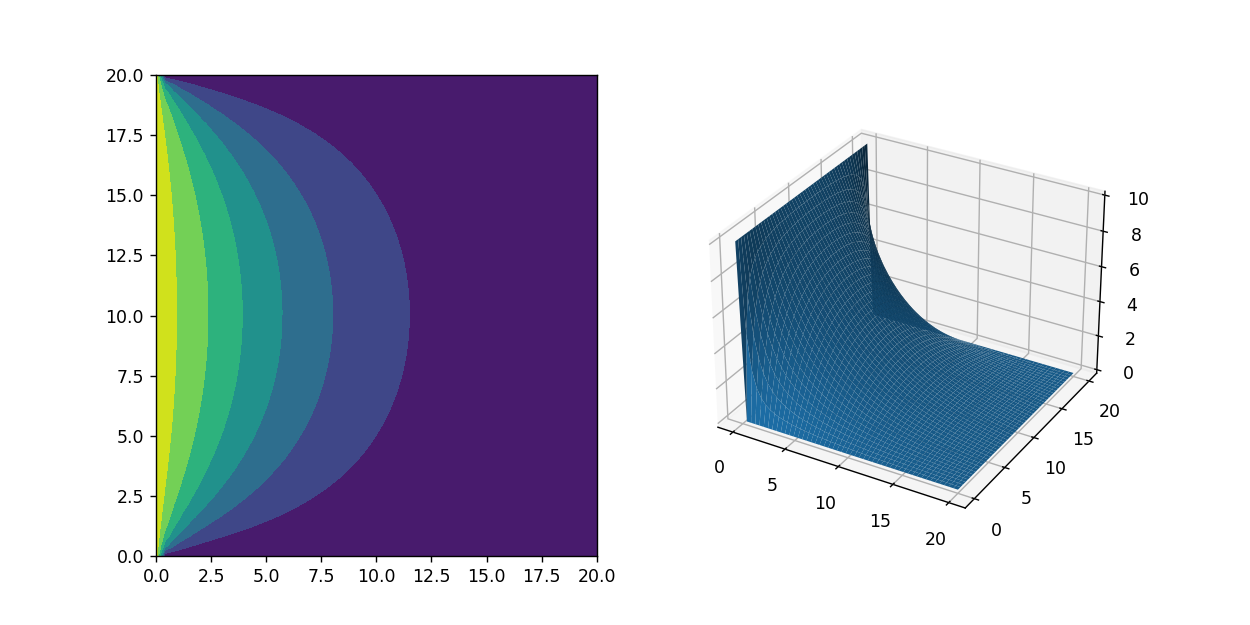

In [191]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection='3d')

X,Y = np.meshgrid(x,y)

c = ax.contourf(X,Y,Tf1)

ax1.plot_surface(X,Y,Tf1)

---

**2. Conducción de calor 2D:** Resolver la ecuación diferencial de conducción de calor $2D$ en el siguiente dominio rectangular $(x, y) \in [0, 1] \times [0, 1]$, $t \geq 0$. $\alpha = \beta = 1$, la discretización es $\Delta{x} = \Delta{y} = 0.2$ y $\Delta{t} = 0.1$. $T_{max} = 1$ s. La ecuación diferencial tiene las siguientes condiciones:

(a) Condición inicial:

$$u(0, x, y) = \sin(\pi(x + y))$$

(b) Condiciones de frontera:

$$u(0, y, t) = e^{-2\pi^{2}t}\sin(\pi{y})$$

$$u(x, 0, t) = e^{-2\pi^{2}t}\sin(\pi{x})$$

$$u(x, 1, t) = e^{-2\pi^{2}t}\sin(\pi{(1 + x)})$$

$$u(1, y, t) = e^{-2\pi^{2}t}\sin(\pi{(1 + y)})$$

---

In [327]:
#Condiciones iniciales
T_max = 1
dx,dy = 0.2,0.2
dt = 1e-1
alpha,beta =0.09043,0.09043

In [328]:
#Condiciones de frontera

def h(t,x,y):
    return np.exp(-2*np.pi**2*t)*np.sin(np.pi*(x+y))


In [329]:
x = np.arange(0,1+1e-4,dx)
y = np.arange(0,1+1e-4,dy)
t = np.arange(0,T_max+1e-2,dt)
Nx,Ny,Nt = len(x),len(y),len(t)

def init():
    
    
    ax.set_xlim3d(0,1)
    ax.set_ylim3d(0,1)
    ax.set_zlim3d()

def InitT():
    
    T = np.zeros((Nt,Nx,Ny))
    
    for l in range(len(t)):
        T[l,0,:] = h(t[l],0.,y)
        T[l,:,0] = h(t[l],x,0.)
        T[l,:,-1] = h(t[l],x,1.)
        T[l,-1,:] = h(t[l],1.,y)
    
    return T

In [330]:
lambda_ = alpha*dt/dx**2
mu_ = beta*dt/dy**2

def GetSolution(omega,T):
    for l in range(1,len(t)):
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                T[l,i,j] = (1-2*lambda_-2*mu_)*T[l-1,i,j] + \
                lambda_*(T[l-1,i+1,j] + T[l-1,i-1,j]) + \
                mu_*(T[l-1,i,j+1] + T[l-1,i,j-1])
                {}
lambda_,mu_

(0.22607499999999997, 0.22607499999999997)

In [331]:
T = InitT()
GetSolution((1/2.5)*0.1,T)

<IPython.core.display.Javascript object>


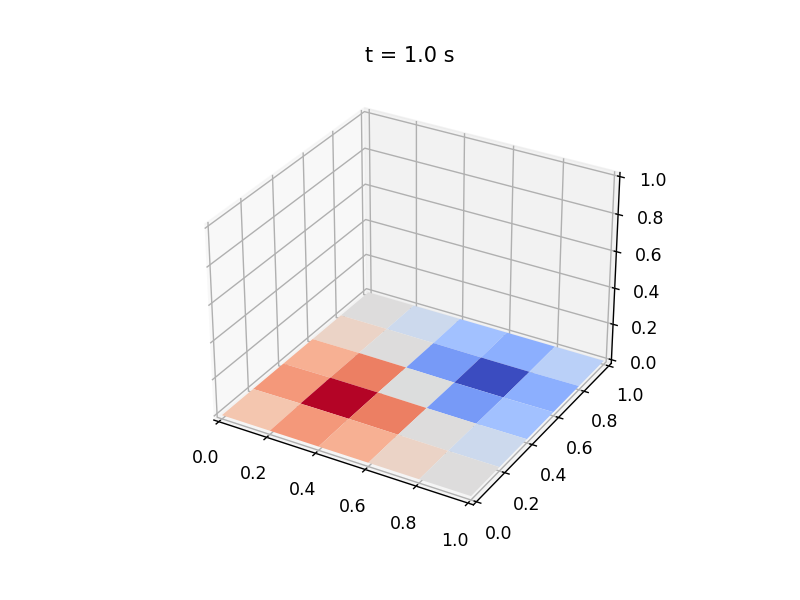

In [332]:
X,Y = np.meshgrid(x,y)
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,T[i,:,:],cmap='coolwarm')
    ax.set_title("t = %s s"%(round(t[i],3)))
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t),init_func=init, repeat = False)

---

**3. Ecuación de Onda 2D, Coordenadas Cilíndricas:** Muestre que la ecuación que describe el método de solución de la ecuación de onda en dos dimensiones considerando coordenadas cilíndricas tiene la forma:

$$u_{i, j}^{l + 1} = \nu^{2} \cdot \left[u_{i + 1, j}^{l} - 2u_{i, j}^{l} + u_{i - 1, j}^{l} + \frac{\Delta\rho}{\rho[i]} \cdot \left(u_{i, j}^{l} - u_{i - 1, j}^{l}\right) + \left(\frac{\lambda}{\rho[i]}\right)^{2} \cdot \left(u_{i, j + 1}^{l} - 2u_{i, j}^{l} + u_{i, j - 1}^{l}\right)\right] + 2u_{i, j}^{l} - u_{i, j}^{l - 1}$$

Dados

$$\lambda := \frac{\Delta\rho}{\Delta\phi} \quad \text{ y } \quad \nu := \frac{\alpha\Delta{t}}{\Delta\rho}$$

---

Para mostrar la ecuación del enunciado se llevarán a cabo los siguientes pasos: Como primer acercamiento, se mostrará la forma del Laplaciano en coordenadas cilíndricas (realmente es denominación polar, pero bueh). Para ello, considere las expresiones fundamentales de la representación en este tipo de coordenadas:

$$x = \rho\cos\phi \quad \text{ y } \quad y = \rho\sin\phi$$

De las cuales se derivan:

$$\rho = \sqrt{x^{2} + y^{2}} \quad \text{ y } \quad \phi = \arctan\left(\frac{y}{x}\right)$$

Ahora, las derivadas que resultan de nuestro interés para definir el Laplaciano son:

$$\frac{\partial \rho}{\partial x} = \frac{x}{\sqrt{x^{2} + y^{2}}} = \frac{\rho\cos\phi}{\rho} = \cos\phi \quad \text{ y } \quad \frac{\partial \rho}{\partial y} = \frac{y}{\sqrt{x^{2} + y^{2}}} = \frac{\rho\sin\phi}{\rho} = \sin\phi$$

$$\frac{\partial \phi}{\partial x} = \frac{1}{\sqrt{1 + y^{2}/x^{2}}} \cdot \left(-\frac{y}{x^{2}}\right) = - \frac{y}{x^{2} + y^{2}} = -\frac{\rho\sin\phi}{\rho^{2}} = -\frac{\sin\phi}{\rho} \quad \text{ y } \quad \frac{\partial \phi}{\partial y} = \frac{1}{\sqrt{1 + y^{2}/x^{2}}} \cdot \left(\frac{1}{x}\right) = \frac{x}{x^{2} + y^{2}} = \frac{\rho\cos\phi}{\rho^{2}} = \frac{\cos\phi}{\rho}$$

Considerando las expresiones para cada término se tiene:

$$\frac{\partial u}{\partial x} = \frac{\partial u}{\partial \rho} \frac{\partial \rho}{\partial x} + \frac{\partial u}{\partial \phi} \frac{\partial \phi}{\partial x} = \frac{\partial u}{\partial \rho}\cos\phi - \frac{\partial u}{\partial \phi}\frac{\sin\theta}{\rho}$$

$$\frac{\partial^{2} u}{\partial x^{2}} = \frac{\partial}{\partial x}\left(\frac{\partial u}{\partial x}\right) = \frac{\partial}{\partial \rho} \left(\frac{\partial u}{\partial x}\right) \frac{\partial \rho}{\partial x} + \frac{\partial}{\partial \phi}\left(\frac{\partial u}{\partial x}\right) \frac{\partial \phi}{\partial x} = \dots$$

$$ = \frac{\partial}{\partial \rho}\left(\frac{\partial u}{\partial \rho}\cos\phi - \frac{\partial u}{\partial \phi}\frac{\sin\theta}{\rho}\right)\cos\phi - \frac{\partial}{\partial \phi}\left(\frac{\partial u}{\partial \rho}\cos\phi - \frac{\partial u}{\partial \phi}\frac{\sin\theta}{\rho}\right) \frac{\sin\phi}{\rho}$$

$$\vdots$$

$$ = \frac{\partial^{2} u}{\partial \rho^{2}}\cos^{2}\phi + \frac{\partial^{2} u}{\partial \phi^{2}}\frac{\sin^{2}\phi}{\rho^{2}} - \frac{\partial^{2} u}{\partial\rho\partial\phi} \frac{\sin(2\phi)}{\rho} + \frac{\partial u}{\partial \phi} \frac{\sin(2\phi)}{\rho^{2}} + \frac{\partial u}{\partial \rho} \frac{\sin^{2}\phi}{\rho}$$

Para $y$:

$$\frac{\partial u}{\partial y} = \frac{\partial u}{\partial \rho} \frac{\partial \rho}{\partial y} + \frac{\partial u}{\partial \phi} \frac{\partial \phi}{\partial y} = \frac{\partial u}{\partial \rho}\sin\phi + \frac{\partial u}{\partial \phi}\frac{\cos\theta}{\rho}$$

$$\frac{\partial^{2} u}{\partial y^{2}} = \frac{\partial}{\partial y}\left(\frac{\partial u}{\partial y}\right) = \frac{\partial}{\partial \rho} \left(\frac{\partial u}{\partial y}\right) \frac{\partial \rho}{\partial y} + \frac{\partial}{\partial \phi}\left(\frac{\partial u}{\partial y}\right) \frac{\partial \phi}{\partial y} = \dots$$

$$ = \frac{\partial}{\partial \rho}\left(\frac{\partial u}{\partial \rho}\sin\phi + \frac{\partial u}{\partial \phi}\frac{\cos\theta}{\rho}\right)\sin\phi + \frac{\partial}{\partial \phi}\left(\frac{\partial u}{\partial \rho}\sin\phi + \frac{\partial u}{\partial \phi}\frac{\cos\theta}{\rho}\right) \frac{\cos\phi}{\rho}$$

$$\vdots$$

$$ = \frac{\partial^{2} u}{\partial \rho^{2}}\sin^{2}\phi + \frac{\partial^{2} u}{\partial \phi^{2}}\frac{\cos^{2}\phi}{\rho^{2}} + \frac{\partial^{2} u}{\partial\rho\partial\phi} \frac{\sin(2\phi)}{\rho} - \frac{\partial u}{\partial \phi} \frac{\sin(2\phi)}{\rho^{2}} + \frac{\partial u}{\partial \rho} \frac{\cos^{2}\phi}{\rho}$$

La suma de los diferenciales da como resultado:

$$\nabla^{2}u = \frac{\partial^{2} u}{\partial x^{2}} + \frac{\partial^{2} u}{\partial y^{2}}$$

$$ = \frac{\partial^{2} u}{\partial \rho^{2}}\cos^{2}\phi + \frac{\partial^{2} u}{\partial \phi^{2}}\frac{\sin^{2}\phi}{\rho^{2}} - \frac{\partial^{2} u}{\partial\rho\partial\phi} \frac{\sin(2\phi)}{\rho} + \frac{\partial u}{\partial \phi} \frac{\sin(2\phi)}{\rho^{2}} + \frac{\partial u}{\partial \rho} \frac{\sin^{2}\phi}{\rho}$$

$$+ \frac{\partial^{2} u}{\partial \rho^{2}}\sin^{2}\phi + \frac{\partial^{2} u}{\partial \phi^{2}}\frac{\cos^{2}\phi}{\rho^{2}} + \frac{\partial^{2} u}{\partial\rho\partial\phi} \frac{\sin(2\phi)}{\rho} - \frac{\partial u}{\partial \phi} \frac{\sin(2\phi)}{\rho^{2}} + \frac{\partial u}{\partial \rho} \frac{\cos^{2}\phi}{\rho}$$

$$\nabla^{2}u = \frac{\partial^{2} u}{\partial \rho^{2}} + \frac{1}{\rho^{2}}\frac{\partial^{2} u}{\partial \phi^{2}} + \frac{1}{\rho}\frac{\partial u}{\partial \rho}$$

Una vez mostrada la expresión del Laplaciano, la ecuación de onda para dos dimensiones puede verse expresada como (aquí consideramos que la onda se desplaza de manera homogénea, para que la simplificación anterior sea consistente):

$$\frac{\partial^{2}u}{\partial t^{2}} = \alpha^{2} \cdot \nabla^{2}u = \alpha^{2} \left[\frac{\partial^{2} u}{\partial \rho^{2}} + \frac{1}{\rho^{2}}\frac{\partial^{2} u}{\partial \phi^{2}} + \frac{1}{\rho}\frac{\partial u}{\partial \rho}\right]$$

Si se discretiza la expresión se obtiene:

$$\frac{u^{l + 1}_{i, j} - 2u^{l}_{i, j} + u^{l - 1}_{i, j}}{(\Delta{t})^{2}} = \alpha^{2} \cdot \left[\frac{u^{l}_{i + 1, j} - 2u^{l}_{i, j} + u^{l}_{i - 1, j}}{(\Delta{\rho})^{2}} + \frac{1}{\rho[i]^{2}}\frac{u^{l}_{i, j + 1} - 2u^{l}_{i, j} + u^{l}_{i, j - 1}}{(\Delta{\phi})^{2}} + \frac{1}{\rho[i]}\frac{u^{l}_{i, j} - u^{l}_{i - 1, j}}{\Delta\rho}\right]$$

Donde $i$ son los índices de cada radio, $j$ los índices de cada ángulo y $l$ el paso temporal. Despejando para el futuro $l + 1$ y reemplazando los valores de $\lambda$ y $\nu$ propuestos, se tiene:

$$u^{l + 1}_{i, j} = (\Delta{t})^{2}\alpha^{2} \cdot \left[\frac{u^{l}_{i + 1, j} - 2u^{l}_{i, j} + u^{l}_{i - 1, j}}{(\Delta{\rho})^{2}} + \frac{1}{\rho[i]^{2}}\frac{u^{l}_{i, j + 1} - 2u^{l}_{i, j} + u^{l}_{i, j - 1}}{(\Delta{\phi})^{2}} + \frac{1}{\rho[i]}\frac{u^{l}_{i, j} - u^{l}_{i - 1, j}}{\Delta\rho}\right] + 2u^{l}_{i, j} - u^{l - 1}_{i, j}$$

$$u^{l + 1}_{i, j} = \left(\frac{\alpha\Delta{t}}{\Delta{\rho}}\right)^{2} \cdot \left[u^{l}_{i + 1, j} - 2u^{l}_{i, j} + u^{l}_{i - 1, j} + \left(\frac{\Delta\rho}{\rho[i]\Delta{\phi}}\right)^{2} \left(u^{l}_{i, j + 1} - 2u^{l}_{i, j} + u^{l}_{i, j - 1}\right) + \frac{\Delta\rho}{\rho[i]} \left(u^{l}_{i, j} - u^{l}_{i - 1, j}\right)\right] + 2u^{l}_{i, j} - u^{l - 1}_{i, j}$$

Es decir:

$$u_{i, j}^{l + 1} = \nu^{2} \cdot \left[u_{i + 1, j}^{l} - 2u_{i, j}^{l} + u_{i - 1, j}^{l} + \left(\frac{\lambda}{\rho[i]}\right)^{2} \cdot \left(u_{i, j + 1}^{l} - 2u_{i, j}^{l} + u_{i, j - 1}^{l}\right) + \frac{\Delta\rho}{\rho[i]} \cdot \left(u_{i, j}^{l} - u_{i - 1, j}^{l}\right)\right] + 2u_{i, j}^{l} - u_{i, j}^{l - 1}$$

La expresión mostrada en el inciso.

---

**5. Ecuación de Onda en 2D:** Resuelva la ecuación de onda en dos dimensiones:

$$\frac{\partial^{2}u(x, y, t)}{\partial{t}^{2}} = v^{2} \cdot \left(\frac{\partial^{2}u(x, y, t)}{\partial{x}^{2}} + \frac{\partial^{2}u(x, y, t)}{\partial{y}^{2}}\right)$$

donde $v = 2$ m$/$s, con $(x, y) \in R := [0, 2] \times [0, 2]$ m$^{2}$ y $t \geq 0$; con la condición inicial:

$$u(x, y, 0) = \sin(\pi{x})\sin(\pi{y})$$

La velocidad de la onda en $t = 0$ es cer0. Notar que la condición de contorno establece que las fronteras no cambian en el tiempo.

---

In [16]:
Nx = 30
Ny = 30
Nt = 10000

x_ = np.linspace(0.,2.,Nx)
y_ = np.linspace(0.,2.,Ny)
t_ = np.linspace(0.,10.,Nt)

dx = x_[1] - x_[0]
dy = y_[1] - y_[0]
dt = t_[1] - t_[0]

v = 2. # m/s
alpha = v
beta = v

lambda_ = (alpha*dt)/dx
mu_ = (beta*dt)/dy

def initT():
    u = np.zeros((Nt,Nx,Ny))
    
    for i in range(Nx):
        for j in range(Ny):
            u[:,i,j] = np.sin(np.pi*x_[i])*np.sin(np.pi*y_[j])
    return u

lambda_, mu_ # Entran en la región de estabilidad.

(0.029002900290029002, 0.029002900290029002)

In [17]:
Wave = initT()

In [24]:
def DetEvolve(u):
    for l in tqdm(range(1, len(t_))):
        if l == 1:
            u[l,:,:] = u[l - 1,:,:]
        else:
            for i in range(1, len(x_) - 1):
                for j in range(1, len(y_) - 1):
                    u[l, i, j] = 2*(1 - lambda_**2 - mu_**2)*u[l - 1, i, j] \
                                 + (lambda_**2)*(u[l - 1, i + 1, j] + u[l - 1, i - 1, j]) \
                                 + (mu_**2)*(u[l - 1, i, j + 1] + u[l - 1, i, j - 1]) - u[l - 2, i, j] 
    return u

In [25]:
Wave_ = DetEvolve(Wave) 

100%|█████████████████████████████████████████████████████████████████████████████| 9999/9999 [00:19<00:00, 505.30it/s]


<IPython.core.display.Javascript object>


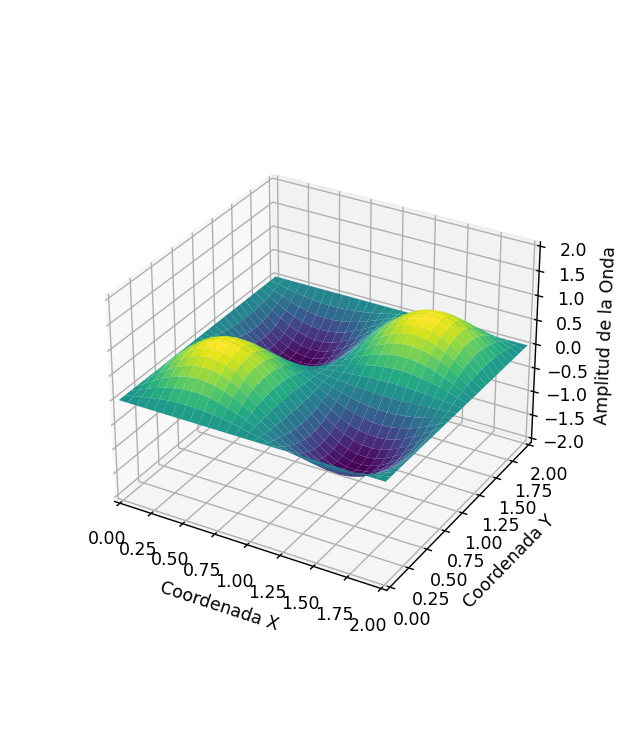

In [26]:
fig_ = plt.figure(figsize=(5,6))
ax_ = fig_.add_subplot(111, projection='3d')

X_,Y_ = np.meshgrid(x_,y_)

def init_():
    ax_.set_xlim3d(0,2)
    ax_.set_ylim3d(0,2)
    ax_.set_zlim3d(-2,2)
    ax_.set_zlabel("Amplitud de la Onda")
    ax_.set_ylabel("Coordenada Y")
    ax_.set_xlabel("Coordenada X")

scale = 25
    
def Update_(i):
    ax_.clear()
    init_()
    ax_.plot_surface(X_,Y_,Wave_[::scale][i,:,:],cmap='viridis')
    
Animation_ = anim.FuncAnimation(fig_,Update_,frames=len(t_[::scale]),init_func=init_, repeat = False)

In [21]:
# La animación se encuentra en la carpeta del respositorio. Fue hecha con Nx = Ny = 100, por lo que se animó el
# escenario para que se vea más preciso.